## Jupyter 机器学习环境搭建

- Mac：[Mac 10.13 安装 Python-3.6.8 和 IPython-Notebook](https://dlonng.com/posts/ipynb-install)
- Windows：待更新
- Ubuntu：待更新
- Other Linux：待更新

## 一、读取原始数据

In [131]:
# pandas: Python Data Analysis Library 提供大量能快速便捷地处理数据的函数和方法
import pandas as pd

# seaborn: statistical data visualization 高层数据可视化库
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")

# Matplotlib：2D Python 绘图包
import matplotlib.pyplot as plt

# Tensorflow：端到端开源机器学习平台
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Numpy：一个运行速度非常快的数学库，主要用于大量的维度数组与矩阵运算
import numpy as np

In [132]:
# 读取数据，第一列命令为 population，第二列命名为 profit
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [133]:
# 输出前 5 行数据
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [134]:
# 输出数据的属性
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# 二、可视化原始数据

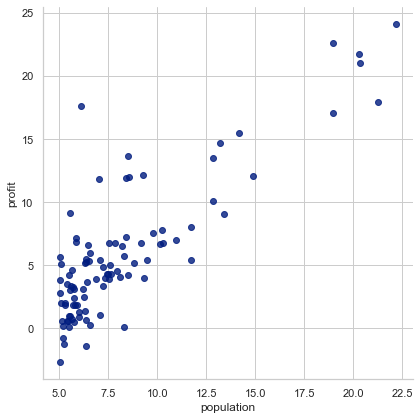

In [135]:
sns.lmplot('population', 'profit', df, height=6, fit_reg=False)
plt.show()

## 三、定义函数

In [136]:
# 读取数据特征
def get_X(df):
    # 创建 m 行 1 列的数据帧
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    # 合并全 1 向量作为元素数据第一列，axis = 0 按行合并，anix = 1 按列合并
    data = pd.concat([ones, df], axis=1)
    
    return data.iloc[:, :-1].values

In [137]:
# 读取数据值，即数据标签
def get_y(df):
    # 返回原始数据最后一列组成的数组，df.iloc[:, -1] 指最后一列
    return np.array(df.iloc[:, -1])

## 四、计算代价函数 Cost Function

In [138]:
# 读取数据
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

# 输出前 5 行
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [139]:
# 查看特征属性
X = get_X(data)
print(X.shape, type(X))
print(X)

(97, 2) <class 'numpy.ndarray'>
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]

In [140]:
# 查看标签属性
y = get_y(data)
print(y.shape, type(y))

(97,) <class 'numpy.ndarray'>


In [141]:
# X.shape[1] = 2，表示特征数 n = 2，theta = [theta_0, theta_1]
theta = np.zeros(X.shape[1])

In [142]:
# Cost Function
# X: R(m * n) 特征矩阵
# y: R(m * 1) 标签值矩阵
# theta: R(n) 线性回归参数
def lr_cost(theta, X, y):
    # m 为样本数
    m = X.shape[0]
    
    # 误差 = theta * x - y
    inner = X @ theta - y
    
    # 将平方计算转换为：行向量 * 列向量
    square_sum = inner.T @ inner
    
    # 缩小成本量大小
    cost = square_sum / (2 * m)
    
    return cost;

In [143]:
# 当 theta 初始为 0 时，计算当前成本 cost
lr_cost(theta, X, y)

32.072733877455676

## 五、批量梯度下降法

In [144]:
# 计算偏导数
def gradient(theta, X, y):
    m = X.shape[0]
    
    inner = X.T @ (X @ theta - y)
    
    return inner / m

In [145]:
# 批量梯度下降
# epoch: 下降迭代次数
# alpha: 初始学习率
def batch_gradient_decent(theta, X, y, epoch, alpha = 0.01):
    # 计算初始成本：theta 都为 0
    cost_data = [lr_cost(theta, X, y)]
    
    # 创建新的 theta 变量，不与原来的混淆
    _theta = theta.copy()
    
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
        
    return _theta, cost_data

In [146]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [147]:
# 输出最优参数
final_theta

array([-2.28286727,  1.03099898])

In [148]:
# 输出成本量的迭代过程
cost_data

[32.072733877455676,
 6.737190464870011,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.890094943117332,
 5.885004158443646,
 5.8799324804914175,
 5.874879094762575,
 5.869843911806386,
 5.864826865312929,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183862,
 5.820478885007098,
 5.815639648492155,
 5.810817842627869,
 5.806013404630045,
 5.80122627194063,
 5.796456382226899,
 5.791703673380653,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319382,
 5.768195683989214,
 5.76354476854712,
 5.758910605434049,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333529,
 5.71347718436475,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.695757917651815,
 5.691367918863752,
 5.686993732597982,
 5.682635301898707,


In [149]:
# 计算最终的成本量
lr_cost(final_theta, X, y)

4.713809531116866

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


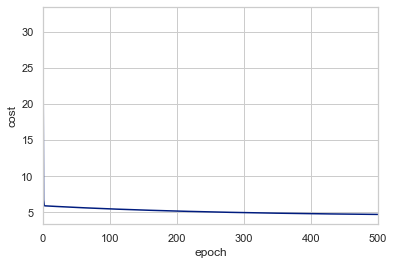

In [150]:
# 可视化代价数据
ax = sns.tsplot(cost_data, time = np.arange(epoch + 1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

# 第二轮代价数据变化很大，之后平滑
plt.show()

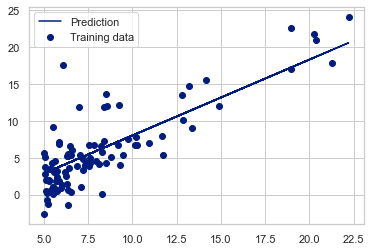

In [151]:
# 可视化最优参数拟合效果, b 为 y 轴截距, m 为斜率
b = final_theta[0]
m = final_theta[1]

plt.scatter(data.population, data.profit, label = 'Training data')
plt.plot(data.population, b + m * data.population, label = 'Prediction')
# loc 表示标签的显示位置，0 显示在最好的位置，2 显示在左上角
plt.legend(loc = 0)
plt.show()

## 六、标准化数据（特征缩放）

In [152]:
# 特征缩放
def normalize_feature(df):
    # 对原始数据每一列应用一个 lambda 函数，mean() 求每列平均值，std() 求标准差
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [161]:
# 显示原始数据
raw_data = pd.read_csv('ex1data2.txt', names = ['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [162]:
# 对原始数据进行特征缩放
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 七、多变量梯度下降

In [165]:
# 输出特征数据维度和类型
X = get_X(data)
print(X.shape, type(X))

(47, 3) <class 'numpy.ndarray'>


In [166]:
# 输出标签数据维度和类型
y = get_y(data)
print(y.shape, type(y))

(47,) <class 'numpy.ndarray'>


In [167]:
# 初始化 theta 参数均为 0
theta = np.zeros(X.shape[1])

In [168]:
# 设置迭代次数
epoch = 500

In [169]:
# 设置学习率
alpha = 0.01

In [170]:
# 多变量批量梯度下降
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha = alpha)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


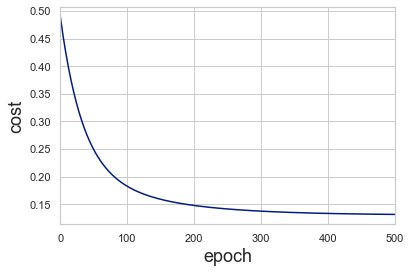

In [78]:
# 代价 - 迭代次数可视化
sns.tsplot(time = np.arange(len(cost_data)), data = cost_data)
plt.xlabel('epoch', fontsize = 18)
plt.ylabel('cost', fontsize = 18)
plt.show()

In [79]:
# 输出迭代的最优参数 theta
final_theta

array([-1.16537985e-16,  8.30383883e-01,  8.23982853e-04])

## 八、学习率

In [110]:
# 以 10 的幂次创建等比数列学习率，开始点 -1 次，结束点 -5 次，元素个数为 4 个
base = np.logspace(-1, -5, num = 4)
print(base)

[1.00000000e-01 4.64158883e-03 2.15443469e-04 1.00000000e-05]


In [111]:
# 将 3 倍的 base 等比数列加入原数列，并排序显示出候选学习率
candidate = np.sort(np.concatenate((base, base * 3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


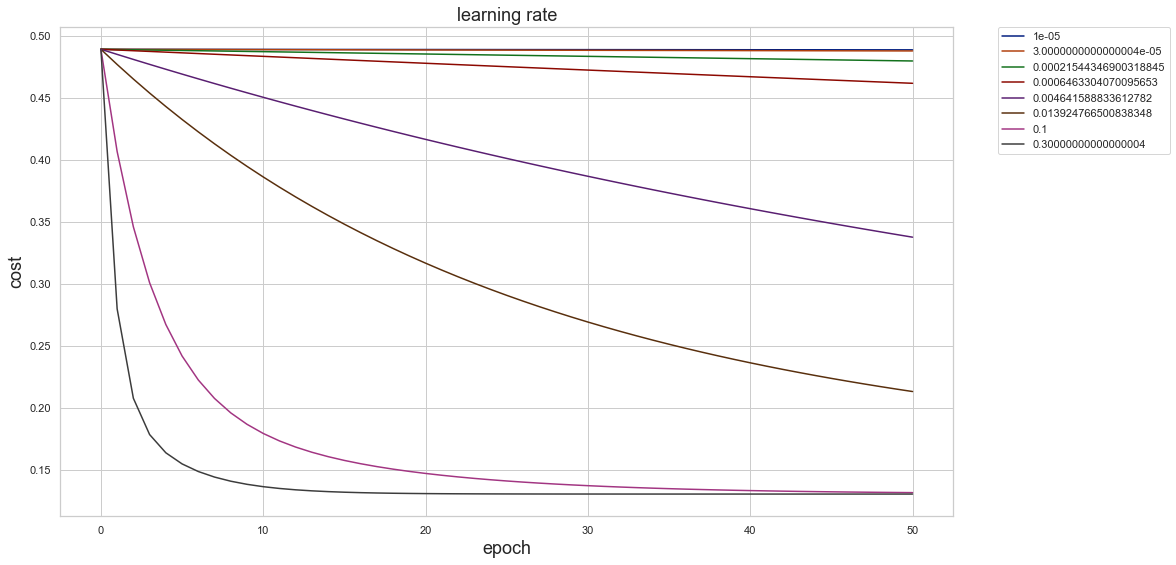

In [113]:
epoch = 50

# 创建一个子图，宽 X 高 = 16 X 9 英寸
fig, ax = plt.subplots(figsize = (16, 9))

# 绘制每个学习率对应的代价 - 迭代次数曲线
for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha = alpha)
    # np.arange(51) = array([0, 1, 2, ..., 50])
    ax.plot(np.arange(epoch + 1), cost_data, label = alpha)

ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('cost', fontsize = 18)

# bbox_to_anchor(num1, num2), 指定图例的起始位置，参数为起始点 （整个坐标轴的高度为1）
# num1 越大曲线标签表格越靠右，num2 越大曲线参数表格越靠上
# borderaxespad：坐标轴与图例之间的距离
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

ax.set_title('learning rate', fontsize = 18)

# 学习率太小会导致算法收敛速度过慢
plt.show()

## 九、正规方程

In [115]:
# 求解正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [116]:
final_theta_normal = normalEqn(X, y)
final_theta_normal

array([-1.11022302e-16,  8.84765988e-01, -5.31788197e-02])

## 十、Tensorflow 不同优化算法的比较

In [119]:
# 读取数据，显示维度和类型
X_data = get_X(data)
print(X_data.shape, type(X_data))

# 转为 Tensorflow 需要的数据
y_data = get_y(data).reshape(len(X_data), 1)
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [120]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):# 这个函数是旧金山的一个大神Lucas Shen写的
      # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)

    # construct the graph
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.constant_initializer())  # n*1

        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

In [121]:
# 设置迭代次数和学习率
epoch = 2000
alpha = 0.01

In [122]:
# 构建优化器字典
optimizer_dict = {'GD': tf.train.GradientDescentOptimizer,
                  'Adagrad': tf.train.AdagradOptimizer,
                  'Adam': tf.train.AdamOptimizer,
                  'Ftrl': tf.train.FtrlOptimizer,
                  'RMS': tf.train.RMSPropOptimizer
                  }

In [123]:
# 保存线性回归的结果
results = []

# 对每个优化算法进行一次线性回归
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer = optimizer_dict[name])
    res['name'] = name
    results.append(res)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


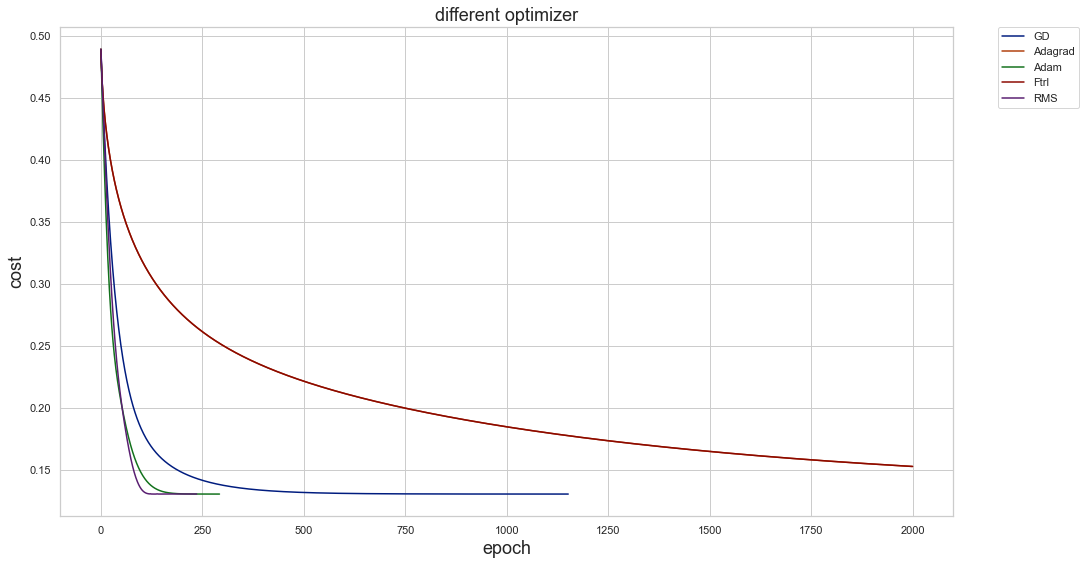

In [124]:
fig, ax = plt.subplots(figsize = (16, 9))

# 绘制每个优化算法的回归曲线
for res in results:
    loss_data = res['loss']
    ax.plot(np.arange(len(loss_data)), loss_data, label = res['name'])

ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('cost', fontsize = 18)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax.set_title('different optimizer', fontsize = 18)
plt.show()